In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
x_train = np.array([1.0, 1.5, 2.0, 2.5, 3.0])
y_train = np.array([300.0, 350.0, 500.0, 550.0, 600.0]) 

In [12]:
def compute_model_output(x, m, b):
    count = x.shape[0]
    arr = np.zeros(count)
    for i in range(count):
        arr[i] = m * x[i] + b
    return arr

In [16]:

def compute_cost(m, b):
    count = x_train.shape[0]
    total_error = 0.0
    for i in range(count):
        pred = m * x_train[i] + b
        total_error += (pred - y_train[i])**2
    return total_error / (2 * count)


In [17]:
def gradient_descent(slope_init, b_init, alpha, iterations):
    m = slope_init
    b = b_init
    cost_history = []
    
    for _ in range(iterations):
        slope_derivative = 0
        bias_gradient = 0
        
        for i in range(len(x_train)):
            error = (m * x_train[i] + b) - y_train[i]
            slope_derivative += error * x_train[i]
            bias_gradient += error
            
        m = m - alpha * (1/len(x_train)) * slope_derivative
        b = b - alpha * (1/len(x_train)) * bias_gradient
        
        cost = compute_cost(m, b)
        cost_history.append(cost)
        
    return m, b, cost_history

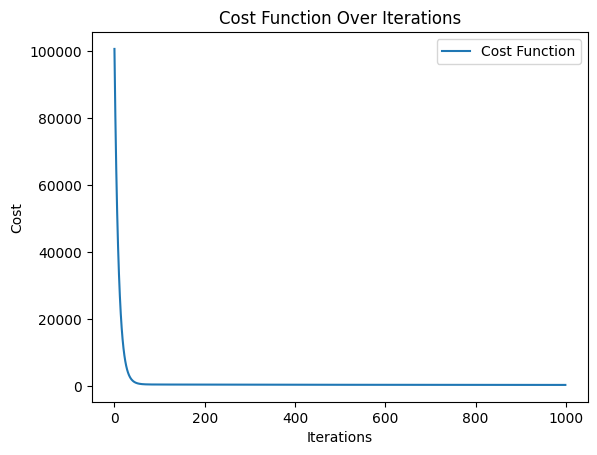

In [24]:
slope_init = 0
b_init = 0
alpha = 0.01
iterations = 1000

m_final, b_final, cost_history = gradient_descent(slope_init, b_init, alpha, iterations)
plt.plot(range(iterations), cost_history, label='Cost Function')
plt.title("Cost Function Over Iterations")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.legend()
plt.show()


Plot the graph relation

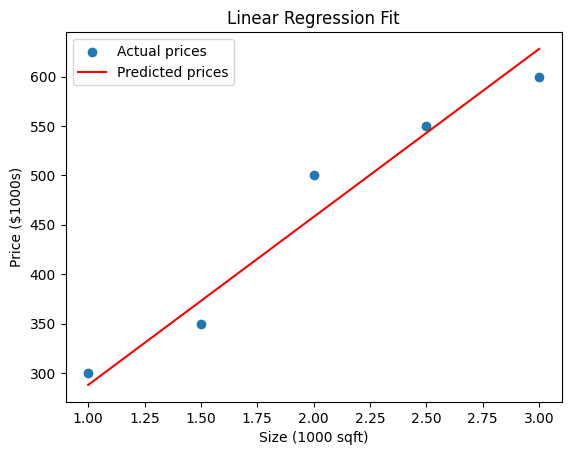

In [19]:
plt.scatter(x_train, y_train, label='Actual prices')
plt.plot(x_train, compute_model_output(x_train, m_final, b_final), 'r-', label='Predicted prices')
plt.title("Linear Regression Fit")
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.show()

Testing with sample example

In [22]:

x_test = 1.2
prediction = m_final * x_test + b_final
print(f"Predicted price for ${(x_test * 1000):.0f} sqft house: ${prediction:.0f} thousand")

Predicted price for $1200 sqft house: $322 thousand
